<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_MMM_Adstock_Saturation_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

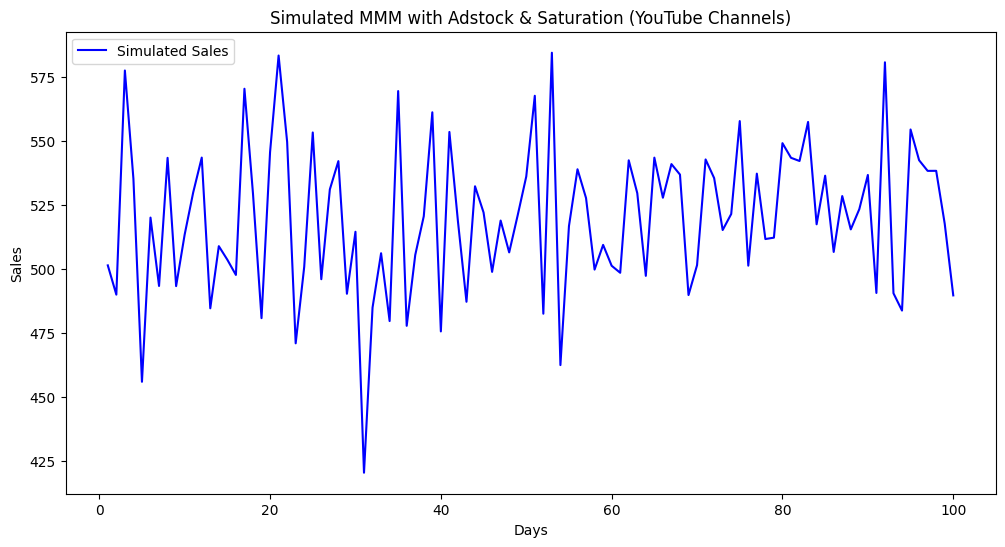

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate ad spend for three YouTube channels
np.random.seed(42)
days = 100
youtube_display_ads = np.random.uniform(200, 700, days)  # Display Ads
youtube_influencers = np.random.uniform(100, 500, days)  # Influencer Sponsorships
youtube_organic = np.random.uniform(50, 300, days)  # Organic Reach

# Adstock transformation function
def adstock(series, decay=0.5):
    adstocked = np.zeros_like(series)
    for t in range(1, len(series)):
        adstocked[t] = series[t] + decay * adstocked[t-1]
    return adstocked

# Apply Adstock effect
decay_rate = 0.6  # Adjust decay factor as needed
youtube_display_adstock = adstock(youtube_display_ads, decay=decay_rate)
youtube_influencer_adstock = adstock(youtube_influencers, decay=decay_rate)
youtube_organic_adstock = adstock(youtube_organic, decay=decay_rate)

# Saturation function (Diminishing Returns)
def saturation(series, alpha=0.0001, beta=0.5):
    return beta * (1 - np.exp(-alpha * series))

# Apply saturation effect
youtube_display_saturation = saturation(youtube_display_adstock)
youtube_influencer_saturation = saturation(youtube_influencer_adstock)
youtube_organic_saturation = saturation(youtube_organic_adstock)

# Generate synthetic sales response (Simple Linear Model)
base_sales = 500
sales = (base_sales +
         200 * youtube_display_saturation +
         150 * youtube_influencer_saturation +
         100 * youtube_organic_saturation +
         np.random.normal(0, 30, days))  # Adding noise for realism

# Create DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'YouTube_Display': youtube_display_ads,
    'YouTube_Influencers': youtube_influencers,
    'YouTube_Organic': youtube_organic,
    'YouTube_Display_Adstock': youtube_display_adstock,
    'YouTube_Influencer_Adstock': youtube_influencer_adstock,
    'YouTube_Organic_Adstock': youtube_organic_adstock,
    'YouTube_Display_Saturation': youtube_display_saturation,
    'YouTube_Influencer_Saturation': youtube_influencer_saturation,
    'YouTube_Organic_Saturation': youtube_organic_saturation,
    'Sales': sales
})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Sales'], label='Simulated Sales', color='blue')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Simulated MMM with Adstock & Saturation (YouTube Channels)')
plt.legend()
plt.show()


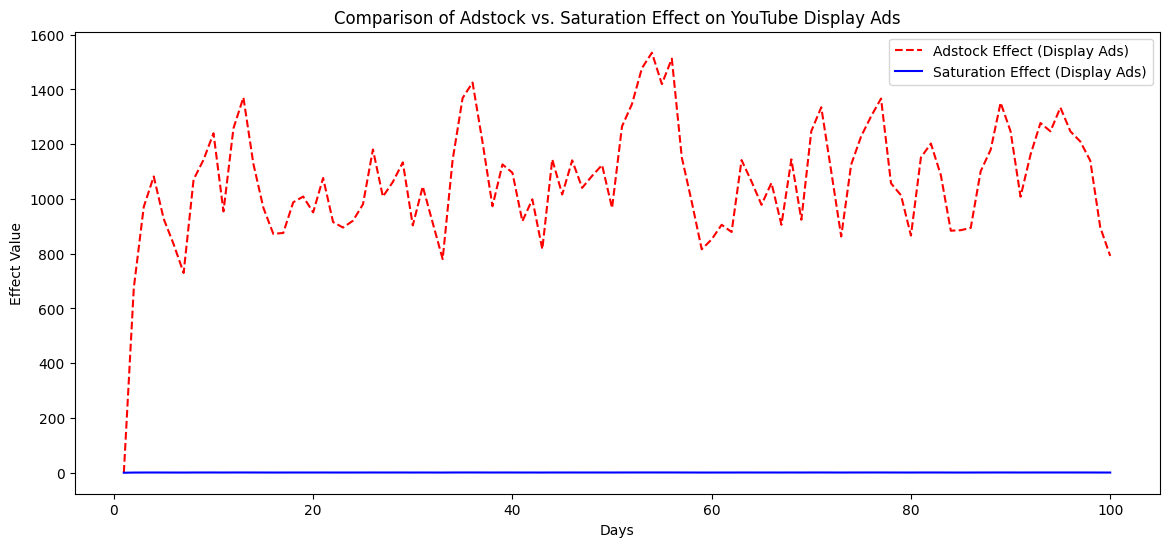

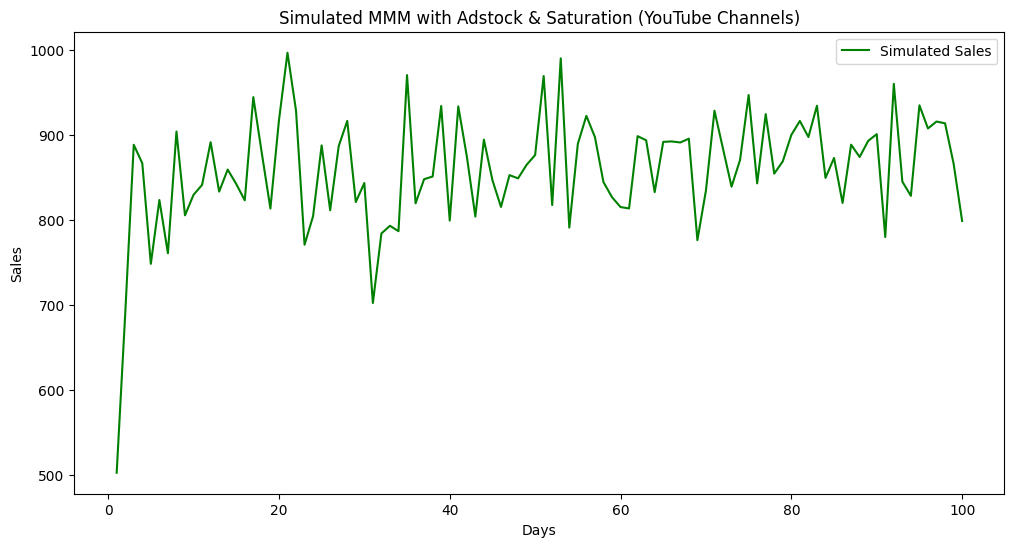

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate ad spend for three YouTube channels
np.random.seed(42)
days = 100
youtube_display_ads = np.random.uniform(200, 700, days)  # Display Ads
youtube_influencers = np.random.uniform(100, 500, days)  # Influencer Sponsorships
youtube_organic = np.random.uniform(50, 300, days)  # Organic Reach

# Adstock transformation function
def apply_adstock(series, decay=0.6):
    adstocked = np.zeros_like(series)
    for t in range(1, len(series)):
        adstocked[t] = series[t] + decay * adstocked[t-1]
    return adstocked

# Apply Adstock effect
decay_rate = 0.6
youtube_display_adstock = apply_adstock(youtube_display_ads, decay=decay_rate)
youtube_influencer_adstock = apply_adstock(youtube_influencers, decay=decay_rate)
youtube_organic_adstock = apply_adstock(youtube_organic, decay=decay_rate)

# Saturation function (Diminishing Returns)
def apply_saturation(series, alpha=0.001, beta=1.2):
    return beta * (1 - np.exp(-alpha * series))

# Apply Saturation AFTER Adstock
youtube_display_saturation = apply_saturation(youtube_display_adstock)
youtube_influencer_saturation = apply_saturation(youtube_influencer_adstock)
youtube_organic_saturation = apply_saturation(youtube_organic_adstock)

# Generate synthetic sales response (Weighted Contribution)
base_sales = 500
sales = (base_sales +
         250 * youtube_display_saturation +
         180 * youtube_influencer_saturation +
         120 * youtube_organic_saturation +
         np.random.normal(0, 50, days))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'YouTube_Display': youtube_display_ads,
    'YouTube_Influencers': youtube_influencers,
    'YouTube_Organic': youtube_organic,
    'YouTube_Display_Adstock': youtube_display_adstock,
    'YouTube_Influencer_Adstock': youtube_influencer_adstock,
    'YouTube_Organic_Adstock': youtube_organic_adstock,
    'YouTube_Display_Saturation': youtube_display_saturation,
    'YouTube_Influencer_Saturation': youtube_influencer_saturation,
    'YouTube_Organic_Saturation': youtube_organic_saturation,
    'Sales': sales
})

# Plot Adstock and Saturation Comparison
plt.figure(figsize=(14, 6))
plt.plot(df['Day'], df['YouTube_Display_Adstock'], label='Adstock Effect (Display Ads)', linestyle='dashed', color='red')
plt.plot(df['Day'], df['YouTube_Display_Saturation'], label='Saturation Effect (Display Ads)', linestyle='solid', color='blue')
plt.xlabel('Days')
plt.ylabel('Effect Value')
plt.title('Comparison of Adstock vs. Saturation Effect on YouTube Display Ads')
plt.legend()
plt.show()

# Plot Simulated Sales
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Sales'], label='Simulated Sales', color='green')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Simulated MMM with Adstock & Saturation (YouTube Channels)')
plt.legend()
plt.show()


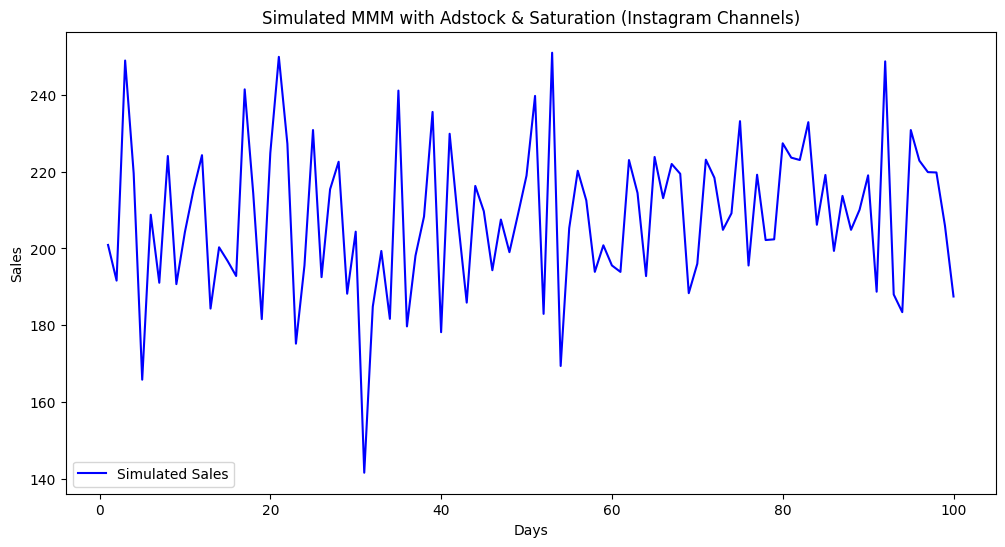

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate ad spend for three Instagram channels
np.random.seed(42)
days = 100
insta_paid = np.random.uniform(100, 500, days)  # Paid ads
insta_influencer = np.random.uniform(50, 300, days)  # Influencer marketing
insta_organic = np.random.uniform(20, 150, days)  # Organic reach

# Adstock transformation function
def adstock(series, decay=0.5):
    adstocked = np.zeros_like(series)
    for t in range(1, len(series)):
        adstocked[t] = series[t] + decay * adstocked[t-1]
    return adstocked

# Apply Adstock effect
decay_rate = 0.5  # Adjust decay factor as needed
insta_paid_adstock = adstock(insta_paid, decay=decay_rate)
insta_influencer_adstock = adstock(insta_influencer, decay=decay_rate)
insta_organic_adstock = adstock(insta_organic, decay=decay_rate)

# Saturation function (Diminishing Returns)
def saturation(series, alpha=0.0001, beta=0.5):
    return beta * (1 - np.exp(-alpha * series))

# Apply saturation effect
insta_paid_saturation = saturation(insta_paid_adstock)
insta_influencer_saturation = saturation(insta_influencer_adstock)
insta_organic_saturation = saturation(insta_organic_adstock)

# Generate synthetic sales response (Simple Linear Model)
base_sales = 200
sales = (base_sales +
         150 * insta_paid_saturation +
         100 * insta_influencer_saturation +
         80 * insta_organic_saturation +
         np.random.normal(0, 20, days))  # Random noise

# Create DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'Paid_Ads': insta_paid,
    'Influencer': insta_influencer,
    'Organic': insta_organic,
    'Paid_Ads_Adstock': insta_paid_adstock,
    'Influencer_Adstock': insta_influencer_adstock,
    'Organic_Adstock': insta_organic_adstock,
    'Paid_Ads_Saturation': insta_paid_saturation,
    'Influencer_Saturation': insta_influencer_saturation,
    'Organic_Saturation': insta_organic_saturation,
    'Sales': sales
})

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Sales'], label='Simulated Sales', color='blue')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Simulated MMM with Adstock & Saturation (Instagram Channels)')
plt.legend()
plt.show()


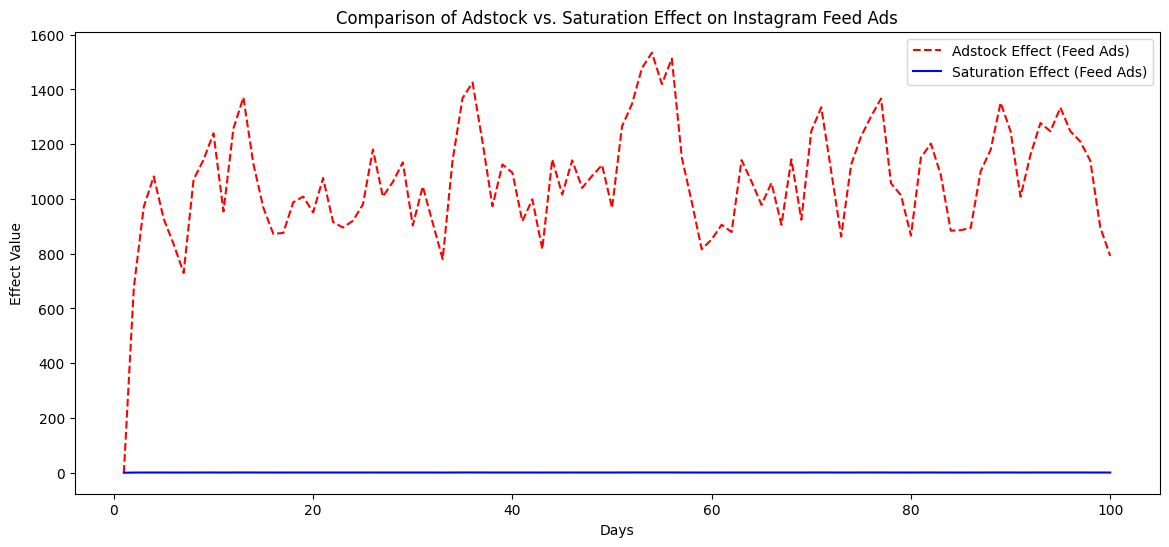

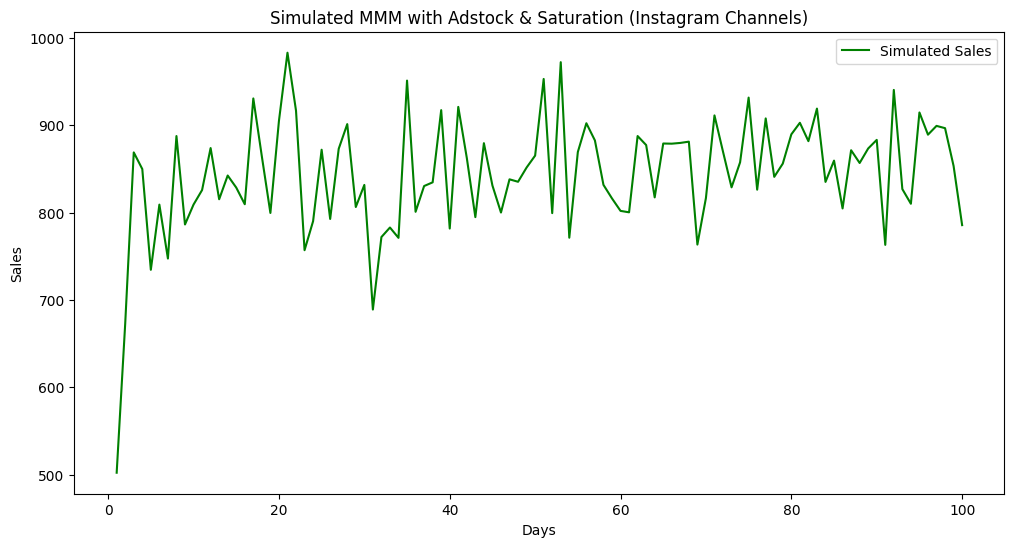

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of days
days = 100

# Simulate ad spend for Instagram channels
insta_feed_ads = np.random.uniform(200, 700, days)  # Instagram Feed Ads
insta_story_ads = np.random.uniform(100, 500, days)  # Instagram Story Ads
insta_influencer = np.random.uniform(50, 300, days)  # Influencer Marketing

# Function to apply Adstock Effect
def apply_adstock(series, decay=0.6):
    adstocked = np.zeros_like(series)
    for t in range(1, len(series)):
        adstocked[t] = series[t] + decay * adstocked[t-1]
    return adstocked

# Apply Adstock effect with decay factor
decay_rate = 0.6
insta_feed_adstock = apply_adstock(insta_feed_ads, decay=decay_rate)
insta_story_adstock = apply_adstock(insta_story_ads, decay=decay_rate)
insta_influencer_adstock = apply_adstock(insta_influencer, decay=decay_rate)

# Function to apply Saturation Effect (Diminishing Returns)
def apply_saturation(series, alpha=0.001, beta=1.2):
    return beta * (1 - np.exp(-alpha * series))

# Apply Saturation AFTER Adstock
insta_feed_saturation = apply_saturation(insta_feed_adstock)
insta_story_saturation = apply_saturation(insta_story_adstock)
insta_influencer_saturation = apply_saturation(insta_influencer_adstock)

# Generate synthetic sales response (Weighted Contribution)
base_sales = 500  # Base sales without ads
sales = (base_sales +
         220 * insta_feed_saturation +   # Weight for Feed Ads
         180 * insta_story_saturation +  # Weight for Story Ads
         140 * insta_influencer_saturation +  # Weight for Influencer Marketing
         np.random.normal(0, 50, days))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'Instagram_Feed_Ads': insta_feed_ads,
    'Instagram_Story_Ads': insta_story_ads,
    'Instagram_Influencer': insta_influencer,
    'Instagram_Feed_Adstock': insta_feed_adstock,
    'Instagram_Story_Adstock': insta_story_adstock,
    'Instagram_Influencer_Adstock': insta_influencer_adstock,
    'Instagram_Feed_Saturation': insta_feed_saturation,
    'Instagram_Story_Saturation': insta_story_saturation,
    'Instagram_Influencer_Saturation': insta_influencer_saturation,
    'Sales': sales
})

# Plot Adstock vs Saturation for Instagram Feed Ads
plt.figure(figsize=(14, 6))
plt.plot(df['Day'], df['Instagram_Feed_Adstock'], label='Adstock Effect (Feed Ads)', linestyle='dashed', color='red')
plt.plot(df['Day'], df['Instagram_Feed_Saturation'], label='Saturation Effect (Feed Ads)', linestyle='solid', color='blue')
plt.xlabel('Days')
plt.ylabel('Effect Value')
plt.title('Comparison of Adstock vs. Saturation Effect on Instagram Feed Ads')
plt.legend()
plt.show()

# Plot Simulated Sales
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Sales'], label='Simulated Sales', color='green')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Simulated MMM with Adstock & Saturation (Instagram Channels)')
plt.legend()
plt.show()
